In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


In [2]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [6]:
import datetime as dt
# Renaming columns for better clarity
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')


# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)

In [7]:
df

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740,5,May
...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,Sep


In [8]:
df.describe()

,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude,Month_int
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915


<Axes: >

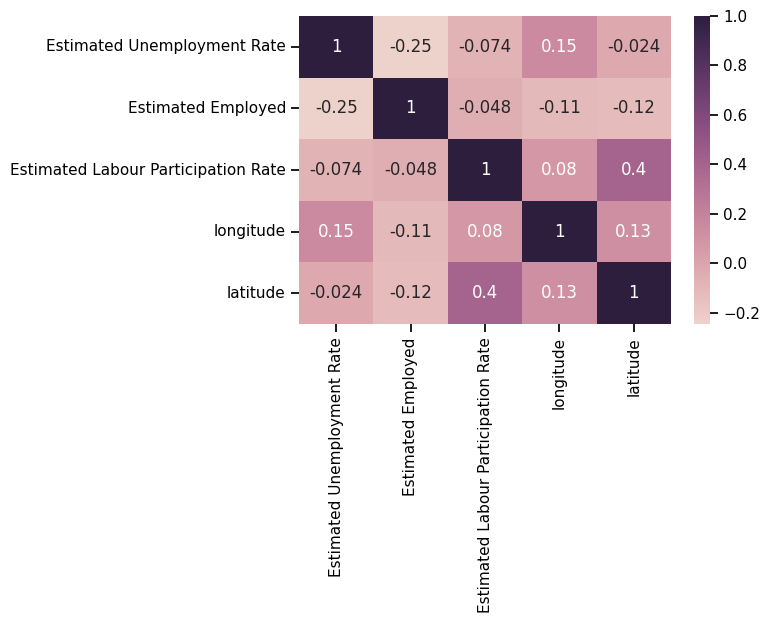

In [9]:
hm = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude']]
hm = hm.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=hm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [10]:
df

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740,5,May
...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,Sep


/tmp/ipykernel_18/2419589586.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = df1.groupby('Region')['Estimated Unemployment Rate'].sum()


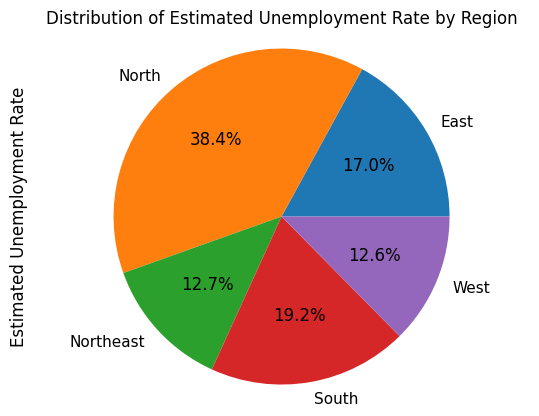

In [11]:
df1 = df[['Region', 'Estimated Unemployment Rate']]
data_grouped = df1.groupby('Region')['Estimated Unemployment Rate'].sum()
data_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

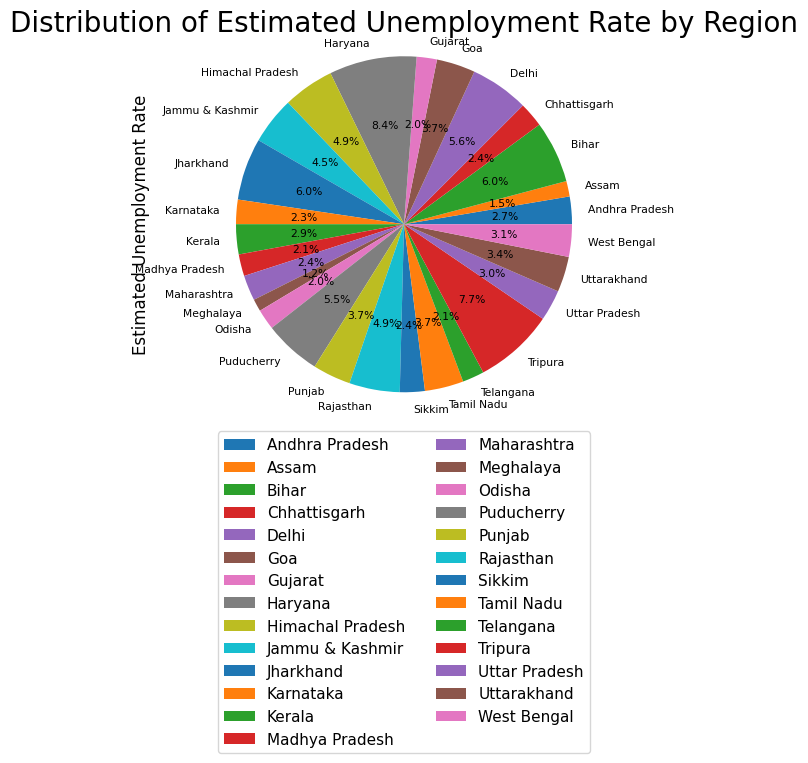

In [12]:
df2 = df[['States', 'Estimated Unemployment Rate']]
states = df['States'].unique()
data_grouped = df2.groupby('States')['Estimated Unemployment Rate'].sum()
data_grouped.plot(kind='pie', autopct='%1.1f%%',fontsize=7.75)
plt.title('Distribution of Estimated Unemployment Rate by Region',fontsize =20)
plt.legend(labels=states, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
print(df.columns)

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude', 'Month_int', 'Month_name'],
      dtype='object')


In [14]:
import plotly.express as px
plot_unemp = df[['Estimated Unemployment Rate','States']]
df_unemployed = plot_unemp.groupby('States').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemployed, x='States',y='Estimated Unemployment Rate',color = 'States',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


The most affected states/territories in India during the lockdown in case of unemployment were:

* Tripura
* Haryana
* Bihar
* Puducherry
* Jharkhand
* Jammu & Kashmir
* Delhi